Скачаем данные

In [494]:
!wget https://storage.geekclass.ru/images/57eecb91-cd8e-4904-b2cb-e1ddc052de4a.csv -O flights.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [495]:
import pandas as pd
import matplotlib as plt

Загрузите данные из файла ```flights.csv```

In [496]:
data = pd.read_csv("flights.csv")

In [497]:
cnt = 0

Наша целевая переменная для классификации: ```Cancelled```, а для регрессии -- ```AirTime``` Сохраним их отдельно и удалим из основных данных

In [498]:
y = data.Cancelled
y_regression = data.AirTime.fillna(0)

data = data.drop(['AirTime','Cancelled'], axis=1)

In [499]:
leaky_features = ["CancellationCode", "Year", "Diverted", "ArrTime", "ActualElapsedTime",
                  "ActualElapsedTime", "ArrDelay", "TaxiIn","TaxiOut", "CarrierDelay",
                  'TailNum', "WeatherDelay", "NASDelay", "SecurityDelay","LateAircraftDelay",'DepTime', 'DepDelay']

```leaky_features``` -- это фичи, которые мы знаем только если знаем целевую. Если модель обучится на них, она не сможет давать предсказания для новых данных.

Удалите эти фичи из данных

In [500]:
data = data.drop(["CancellationCode", "Year", "Diverted", "ArrTime", "ActualElapsedTime",
                  "ActualElapsedTime", "ArrDelay", "TaxiIn","TaxiOut", "CarrierDelay",
                  'TailNum', "WeatherDelay", "NASDelay", "SecurityDelay","LateAircraftDelay", "DepTime", "DepDelay"], axis=1)

Посмотрите на гистограммы признаков. Можно ли какие-то удалить? Почему? 

In [501]:
data

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,CRSElapsedTime,Origin,Dest,Distance
0,1,3,4,1955,2225,WN,335,150,IAD,TPA,810
1,1,3,4,735,1000,WN,3231,145,IAD,TPA,810
2,1,3,4,620,750,WN,448,90,IND,BWI,515
3,1,3,4,930,1100,WN,1746,90,IND,BWI,515
4,1,3,4,1755,1925,WN,3920,90,IND,BWI,515
...,...,...,...,...,...,...,...,...,...,...,...
99994,1,24,4,1935,2257,XE,7676,142,SLC,OKC,866
99995,1,25,5,1935,2257,XE,7676,142,SLC,OKC,866
99996,1,26,6,1935,2257,XE,7676,142,SLC,OKC,866
99997,1,27,7,1935,2257,XE,7676,142,SLC,OKC,866


<Axes: >

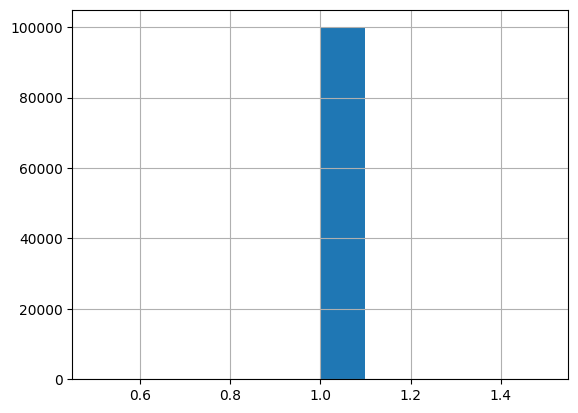

In [502]:
data['Month'].hist()

<Axes: >

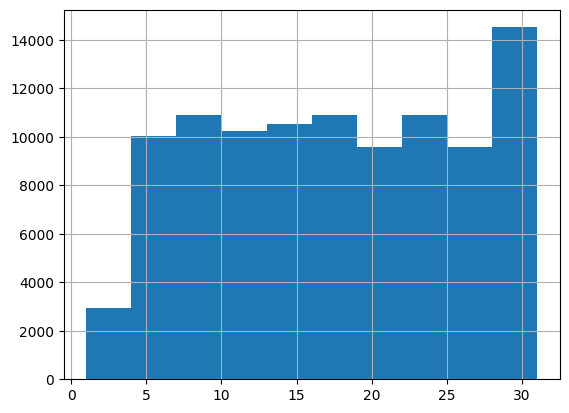

In [503]:
data['DayofMonth'].hist()

<Axes: >

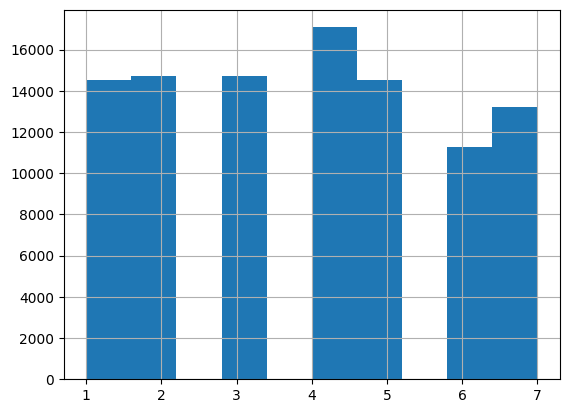

In [504]:
data['DayOfWeek'].hist()

<Axes: >

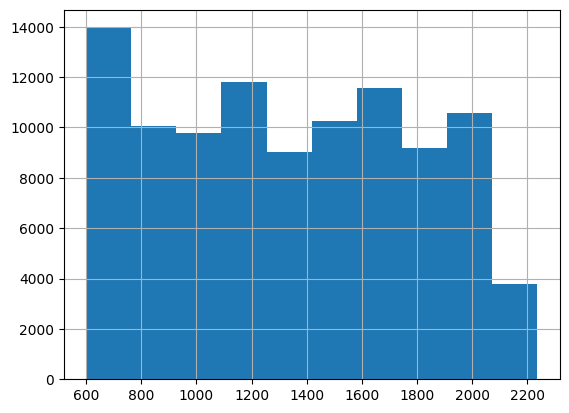

In [505]:
data['CRSDepTime'].hist()

<Axes: >

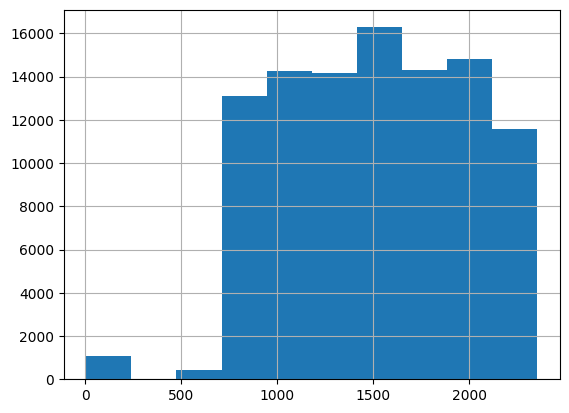

In [506]:
data['CRSArrTime'].hist()

<Axes: >

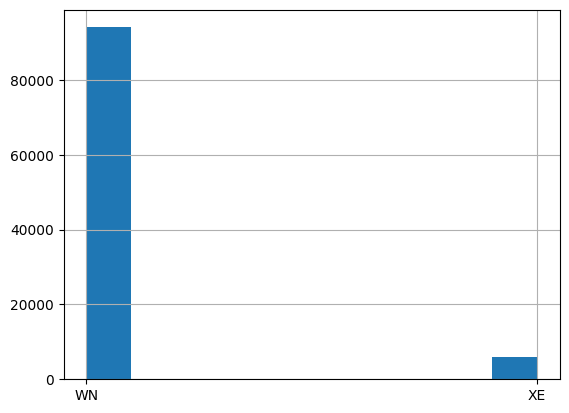

In [507]:
data['UniqueCarrier'].hist()

<Axes: >

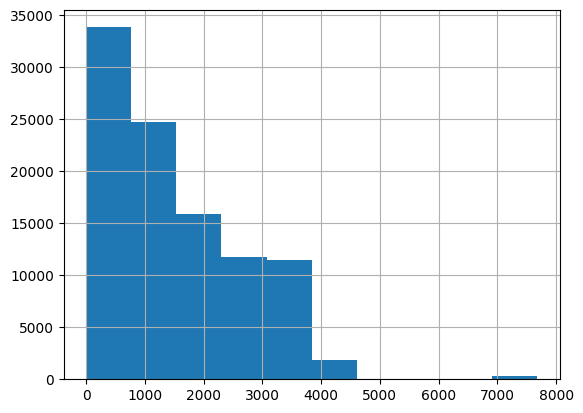

In [508]:
data['FlightNum'].hist()

<Axes: >

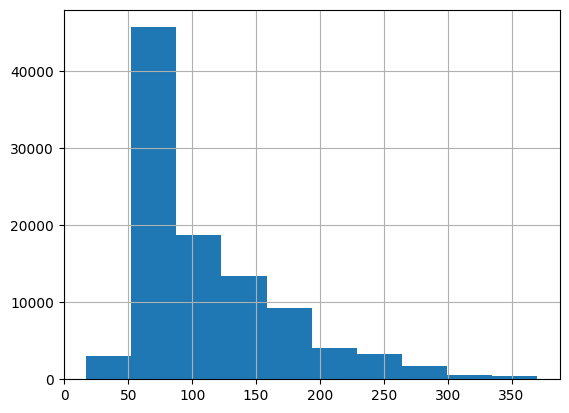

In [509]:
data['CRSElapsedTime'].hist()

<Axes: >

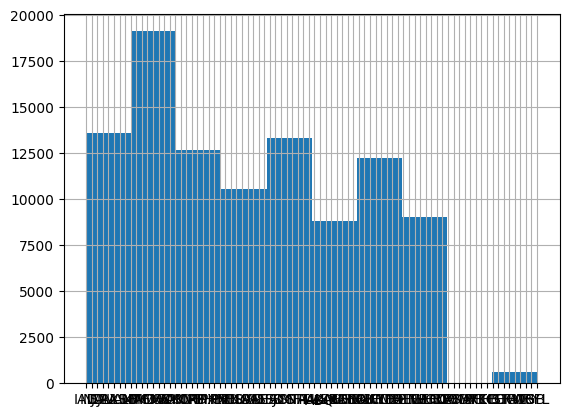

In [510]:
data['Origin'].hist()

<Axes: >

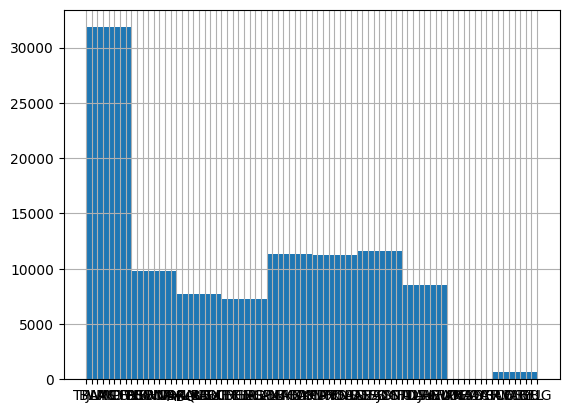

In [511]:
data['Dest'].hist()

<Axes: >

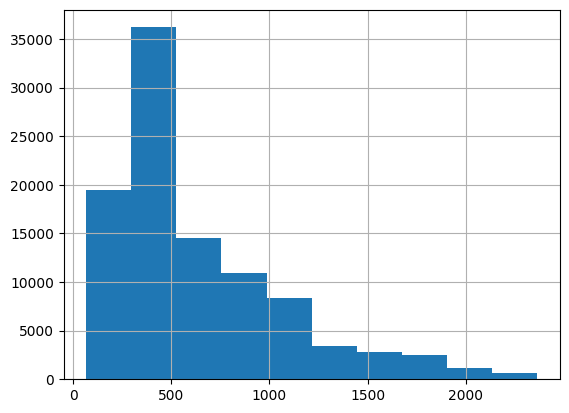

In [512]:
data['Distance'].hist()

Удалите бесполезные признаки, выбранные вами на предыдущем шаге

In [469]:
#data['Month'] можно удалить, так как они везде одинаковый

In [470]:
data = data.drop(['Month'], axis=1)

Переведите все категориальные признаки в числовые. 
Значения признанов, встречающиеся менее 50 раз замените на значение ```Rare```.

Если значение ```Rare``` встречается меньше 50 раз, не надо добавлять его как отдельную колонку.

(если это задание не получается, просто удалите категориальные признаки, но это будет стоить вам баллов)

Подсказка: можете использовать pd.get_dummies (Можно использовать tab и shift+tab для того, чтобы открыть документацию)

In [471]:
#for col in data.columns:
#    if data[col].dtype == 'object': # Выбираем категориальные признаки
        

In [472]:
# cnt = 0
# data_makeint1 = pd.get_dummies(data['UniqueCarrier'], prefix='is_')
# for col in data_makeint1.columns:
#     data_makeint1[col] = data_makeint1[col].astype(int)
# for col in data_makeint1.columns:
#     if col != "is_UniqueCarrier_Rare":
#         if data_makeint1[col].sum() < 50:
#             data_makeint1.drop([col], axis=0)
#             cnt += 1
#             data_makeint1['is_UniqueCarrier_Rare'] = cnt
#             data_makeint1 = data_makeint1.drop([col], axis=1)

In [518]:
# cnt = 0
# data_makeint2 = pd.get_dummies(data['Origin'], prefix='is_')
# for col in data_makeint2.columns:
#     data_makeint2[col] = data_makeint2[col].astype(int)
# for col in data_makeint2.columns:
#     if col != "is_Origin_Rare":
#         if data_makeint2[col].sum() < 50:
#             cnt += 1
#             data_makeint2['is_Origin_Rare'] = cnt
#             data_makeint2 = data_makeint2.drop([col], axis=1)

In [491]:
# cnt = 0
# data_makeint3 = pd.get_dummies(data['Dest'], prefix='is_')
# for col in data_makeint3.columns:
#     data_makeint3[col] = data_makeint3[col].astype(int)
# for col in data_makeint3.columns:
#     if col != "is_Dest_Rare":
#         if data_makeint3[col].sum() < 50:
#             data_makeint3.drop([col], axis=0)
#             cnt += 1
#             data_makeint3['is_Dest_Rare'] = cnt
#             data_makeint3 = data_makeint3.drop([col], axis=1)

In [439]:
# data = pd.concat([data, data_makeint1] , axis=1)
# data = pd.concat([data, data_makeint2] , axis=1)
# data = pd.concat([data, data_makeint3] , axis=1)

In [440]:
# data

,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,CRSElapsedTime,Origin,Dest,Distance,...,is__SFO,is__SJC,is__SLC,is__SMF,is__SNA,is__STL,is__TPA,is__TUL,is__TUS,is_Dest_Rare
0,3,4,1955,2225,WN,335,150,IAD,TPA,810,...,0,0,0,0,0,0,1,0,0,12
1,3,4,735,1000,WN,3231,145,IAD,TPA,810,...,0,0,0,0,0,0,1,0,0,12
2,3,4,620,750,WN,448,90,IND,BWI,515,...,0,0,0,0,0,0,0,0,0,12
3,3,4,930,1100,WN,1746,90,IND,BWI,515,...,0,0,0,0,0,0,0,0,0,12
4,3,4,1755,1925,WN,3920,90,IND,BWI,515,...,0,0,0,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,24,4,1935,2257,XE,7676,142,SLC,OKC,866,...,0,0,0,0,0,0,0,0,0,12
99995,25,5,1935,2257,XE,7676,142,SLC,OKC,866,...,0,0,0,0,0,0,0,0,0,12
99996,26,6,1935,2257,XE,7676,142,SLC,OKC,866,...,0,0,0,0,0,0,0,0,0,12
99997,27,7,1935,2257,XE,7676,142,SLC,OKC,866,...,0,0,0,0,0,0,0,0,0,12


In [403]:
# for col in data.columns:
#     if data[col].dtype == 'object':
#         data = data.drop([col], axis=1) # Выбираем категориальные признаки

In [445]:
# data['is_Origin_Rare']

0        13
1        13
2        13
3        13
4        13
         ..
99994    13
99995    13
99996    13
99997    13
99998    13
Name: is_Origin_Rare, Length: 99999, dtype: int64

In [406]:
# data_makeinput = data.copy()
# for col in data.columns:
#     if data_makeinput[col].dtype == 'object': # Выбираем категориальные признаки
#         a=data_makeinput.groupby(col,as_index=False)['Distance'].count()

#         Rare = a[a['Distance']<=50][col]


In [524]:
tdf=data.copy()
for col in data.columns:
    if tdf[col].dtype == 'object': # Выбираем категориальные признаки
        a=tdf.groupby(col,as_index=False)['Distance'].count()

        Rare = a[a['Distance']<=50][col]
        for i in Rare:
          tdf[col]=tdf[col].replace(i,"Rare_"+col)
        tdf = pd.concat([tdf, pd.get_dummies(tdf[col], prefix='Is')] , axis=1)
        tdf=tdf.drop(columns=[col])
data = tdf

In [525]:
data

,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,Distance,Is_WN,Is_XE,Is_ABQ,...,Is_SEA,Is_SFO,Is_SJC,Is_SLC,Is_SMF,Is_SNA,Is_STL,Is_TPA,Is_TUL,Is_TUS
0,3,4,1955,2225,335,150,810,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,3,4,735,1000,3231,145,810,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,4,620,750,448,90,515,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,4,930,1100,1746,90,515,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,4,1755,1925,3920,90,515,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,24,4,1935,2257,7676,142,866,False,True,False,...,False,False,False,False,False,False,False,False,False,False
99995,25,5,1935,2257,7676,142,866,False,True,False,...,False,False,False,False,False,False,False,False,False,False
99996,26,6,1935,2257,7676,142,866,False,True,False,...,False,False,False,False,False,False,False,False,False,False
99997,27,7,1935,2257,7676,142,866,False,True,False,...,False,False,False,False,False,False,False,False,False,False


Заполните отсутствующие значения на своё усмторение

In [ ]:
#Мне лень, я после хакатона и сейчас 23:14 и я все равно буду использовать градиентный бустинг

Отшкалируйте (стандартизируйте) данные

In [ ]:
X = data.values.astype('float32')
X = <...>

In [ ]:
assert np.isfinite(X).all()

Разделим данные на обучающие/тестовые (НЕ ТРОГАЙТЕ ЭТУ КЛЕТКУ!)

In [ ]:
np.random.seed(42)
test_inds = np.arange(X.shape[0])
np.random.shuffle(test_inds)

test_inds = test_inds[:1000]

is_test = np.zeros(X.shape[0], dtype='bool')
is_test[test_inds] = True

X_train = X[~is_test]
X_test = X[is_test]
y_train = y[~is_test]
y_test = y[is_test]
y_regression_train = y_regression[~is_test]
y_regression_test = y_regression[is_test]


Обучите несколько моделей, предсказыаающих ```y```

In [ ]:
from sklearn import <...>

In [ ]:
<...>

Какие метрики измерения качества классификации вы знаете? Что можно сказать об их применимости к данной задаче?

```ВАШ ОТВЕТ```

Постройте ROC кривые для обученных моделей. Вычислите roc_auc для этих моделей.

Подсказка: можете использовать sklearn.metrics

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
<...>

Продолжайте обучать модели пока не получите roc_auc хотя бы 0.8 на тестовых данных

Постройте график Precision-recall для всех моделей.

Выберете модель и порог, при которых самый большой precision при recall не меньше 0.05

In [ ]:
<...>

Посмотрите на важности признаков по мнениям моделей. Что можно сказать? В каких аэропортах больше всего отменяют рейсы? А в каких меньше?

In [ ]:
<...>

Обучите модели для регрессии ```y_regression``` (Почти для каждой модели классификации есть аналогичная модель регрессии)

In [ ]:
from sklearn import <...>

In [ ]:
<...>

Посчитайте MSE для каждой модели. Какая работает лучше всего?

In [ ]:
<...>

Получите MSE как минимум 200